In [1]:
import pandas as pd
import numpy as np
import string
import re
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords  
from sklearn.neighbors import KNeighborsClassifier

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kanis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kanis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kanis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df=pd.read_csv('detection_dataset.csv')
df.drop([],axis=1,inplace=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  232074 non-null  int64 
 1   text        232074 non-null  object
 2   class       232074 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.3+ MB


In [4]:
df.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [3]:
wnl = WordNetLemmatizer()
stopwords=stopwords.words('english')
for x in ["hadn't",'hasn',"hasn't",'haven',"haven't",'isn',"isn't",'no',"nor",'not']:
    stopwords.remove(x)
def data_prep(text):
    text=text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text=' '.join(wnl.lemmatize(t) for t in text.split() if t not in stopwords)
    return text
df['handled_text']=df['text'].apply(data_prep)

In [4]:
df['class']=df['class'].apply(lambda x:1 if x=='suicide' else 0)

In [5]:
df['class'].value_counts()

0    116037
1    116037
Name: class, dtype: int64

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
transformed=tf.fit_transform(df['handled_text'])

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(transformed,df['class'],random_state=1)

In [8]:
from sklearn.naive_bayes import MultinomialNB
mn=MultinomialNB()
mn.fit(X_train,y_train)

MultinomialNB()

In [9]:
from sklearn.metrics import classification_report
y_pred=mn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.78      0.87     29036
           1       0.82      0.97      0.89     28983

    accuracy                           0.88     58019
   macro avg       0.89      0.88      0.88     58019
weighted avg       0.89      0.88      0.88     58019



In [12]:
mn.score(X_test,y_test)

0.8780571881624984

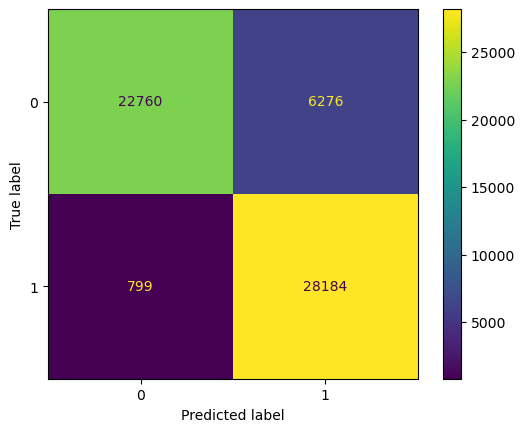

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [14]:
from sklearn.metrics import roc_curve, roc_auc_score
y_score=mn.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold1 = roc_curve(y_test, y_score)
print('roc_auc_score for Multinomial Naive Bayes Model: ', roc_auc_score(y_test, y_score))

roc_auc_score for Multinomial Naive Bayes Model:  0.970963524765198


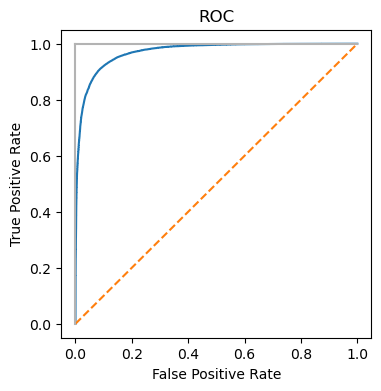

In [17]:
plt.subplots(1, figsize=(4,4))
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [ ]:
# test_df=pd.DataFrame(['I am depressed','I am not feeling well','playing cricket with friends'],columns=['text'])

In [ ]:
# test_df['handled_text']=test_df['text'].apply(data_prep)
# test_df_transformed=tf.transform(test_df['handled_text'])

In [ ]:
# test_df_pred=mn.predict(test_df_transformed)

In [ ]:
# test_df_pred

In [ ]:
import pickle
filename = 'classify_model.sav'
pickle.dump(mn, open(filename, 'wb'))
pickle.dump(tf, open('scaler2.pkl', 'wb'))